In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

# Read data

In [2]:
df = pd.read_csv('spotify_2015_2025_85k.csv')

# Song duration over time

In [ ]:
df_sort_by_date = df.sort_values(by='release_date')
df_sort_by_date['month'] = df_sort_by_date['release_date'].apply(lambda d: dt.strptime(d, '%Y-%m-%d').month)
df_sort_by_date['year'] = df_sort_by_date['release_date'].apply(lambda d: dt.strptime(d, '%Y-%m-%d').year)
df_mean_duration = df_sort_by_date.groupby(['year', 'month'])['duration_ms'].mean().reset_index() # reset_index convert a multi-index Series back to DataFrame

In [7]:
df_mean_duration['month_year'] = df_mean_duration.apply(lambda row: str(int(row['month'])) + '-' + str(int(row['year'])), axis=1)
df_mean_duration

,year,month,duration_ms,month_year
0,2015,1,250756.889197,1-2015
1,2015,2,257457.465347,2-2015
2,2015,3,254905.460725,3-2015
3,2015,4,258169.349254,4-2015
4,2015,5,258135.710720,5-2015
...,...,...,...,...
127,2025,8,254436.363359,8-2025
128,2025,9,256447.778116,9-2025
129,2025,10,251404.595054,10-2025
130,2025,11,253744.535144,11-2025


Text(0, 0.5, 'Duration (s)')

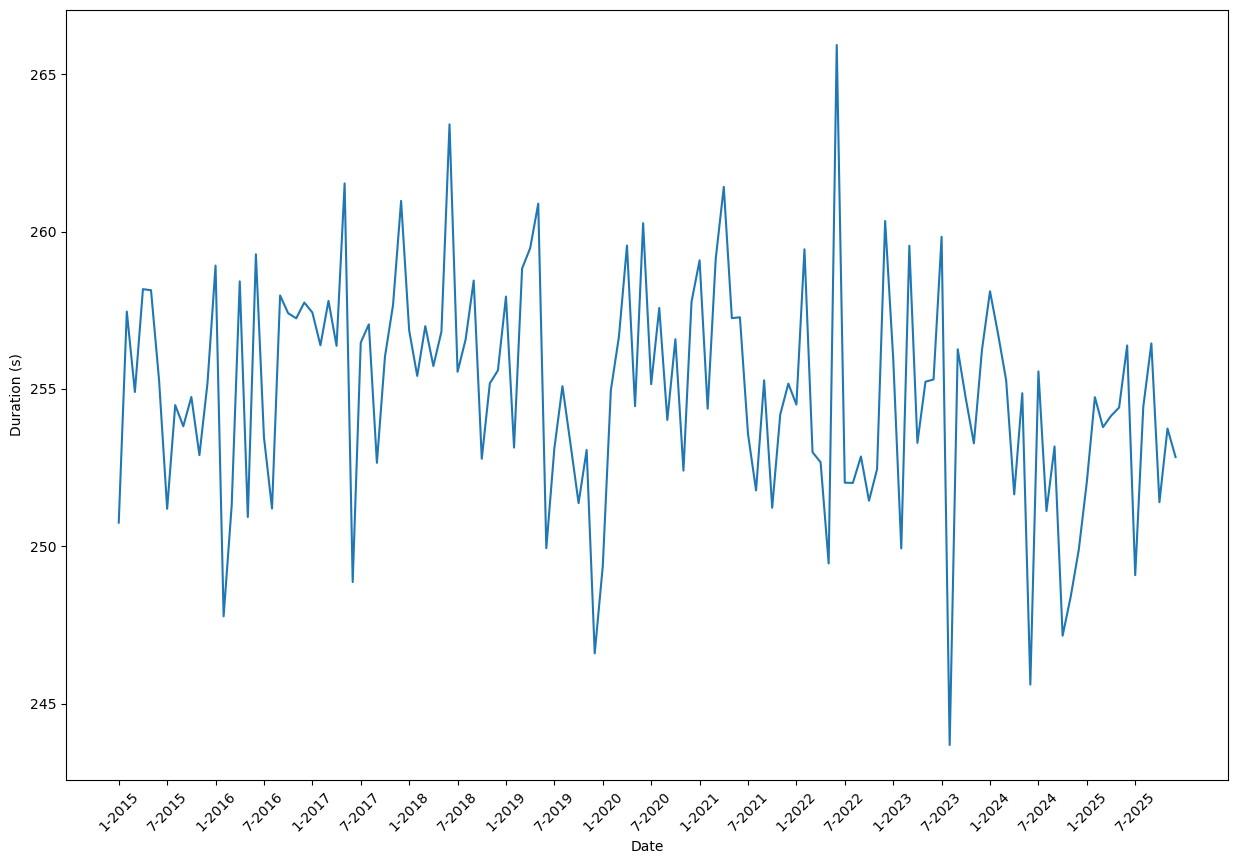

In [ ]:
month_year = df_mean_duration['month_year']
duration = df_mean_duration['duration_ms'] / 1000 # Convert from milisecond to second unit
plt.figure(figsize=(15, 10))
plt.plot(month_year, duration)
plt.xticks(ticks=range(0, len(month_year), 6),
           labels=month_year[::6],
           rotation=45)
plt.xlabel("Date")
plt.ylabel("Duration (s)")

# Mean song duration for each genre

In [43]:
df_mean_duration_per_genre = df.groupby(['genre'])['duration_ms'].mean().reset_index()
df_mean_duration_per_genre_sorted = df_mean_duration_per_genre.sort_values(by='duration_ms')
df_mean_duration_per_genre_sorted

,genre,duration_ms
10,Reggaeton,253668.539494
11,Rock,254064.291719
0,Classical,254102.684968
2,EDM,254499.078619
1,Country,254711.100284
9,R&B,254741.865895
4,Hip-Hop,254805.281425
8,Pop,254905.598929
5,Indie,254972.781504
3,Folk,255625.863559


Text(0, 0.5, 'Genre')

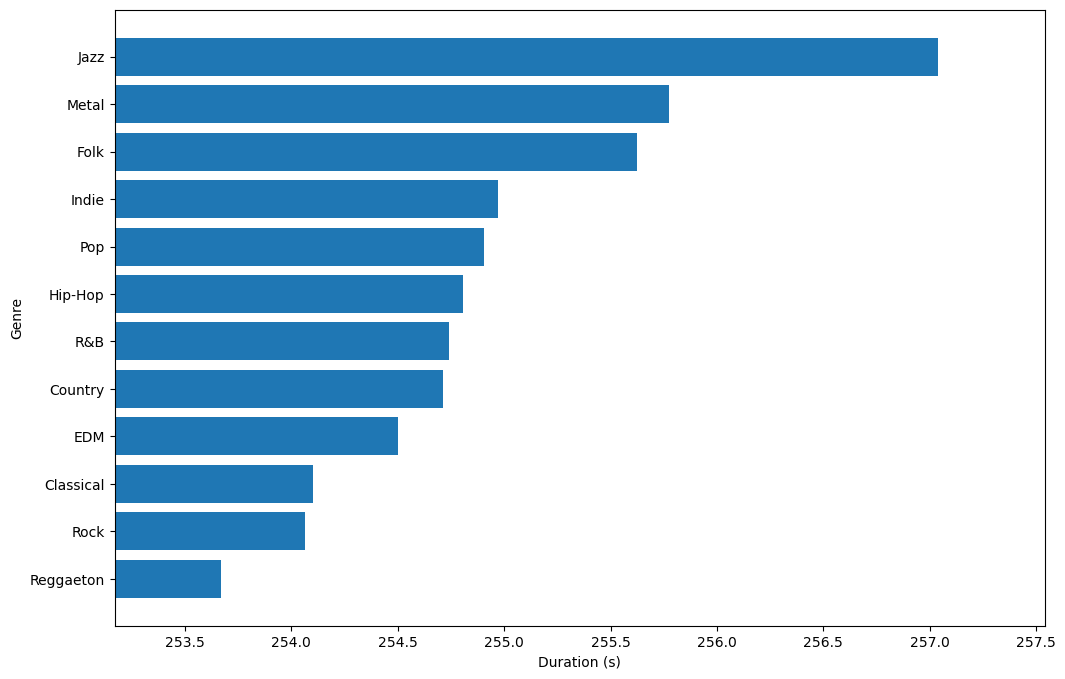

In [44]:
genre = df_mean_duration_per_genre_sorted['genre']
duration = df_mean_duration_per_genre_sorted['duration_ms'] / 1000 # Convert from milisecond to second unit
plt.figure(figsize=(12, 8))
plt.barh(genre, duration)
plt.xlim(min(duration) - 0.5, max(duration) + 0.5)
plt.xlabel('Duration (s)')
plt.ylabel('Genre')

# Top genres in all countries & regions (America, Europe & Asia Pacific)

In [47]:
all_countries = np.unique(df['country'])
region_america = ['Brazil', 'Canada', 'Mexico', 'United States']
region_europe = ['France', 'Germany', 'United Kingdom']
region_apac = ['Australia', 'Japan', 'India']
df_top_genres_all_countries = df.groupby(['genre'])['genre'].count().sort_values()
df_top_genres_region_america = df[df['country'].isin(region_america)].groupby(['genre'])['genre'].count().sort_values()
df_top_genres_region_europe = df[df['country'].isin(region_europe)].groupby(['genre'])['genre'].count().sort_values()
df_top_genres_region_apac = df[df['country'].isin(region_apac)].groupby(['genre'])['genre'].count().sort_values()
df_top_genres_all_countries

genre
EDM          6894
Reggaeton    7001
Indie        7007
Country      7030
Folk         7080
R&B          7084
Pop          7096
Rock         7113
Classical    7158
Hip-Hop      7160
Jazz         7177
Metal        7200
Name: genre, dtype: int64

Text(0.5, 1.0, 'All countries')

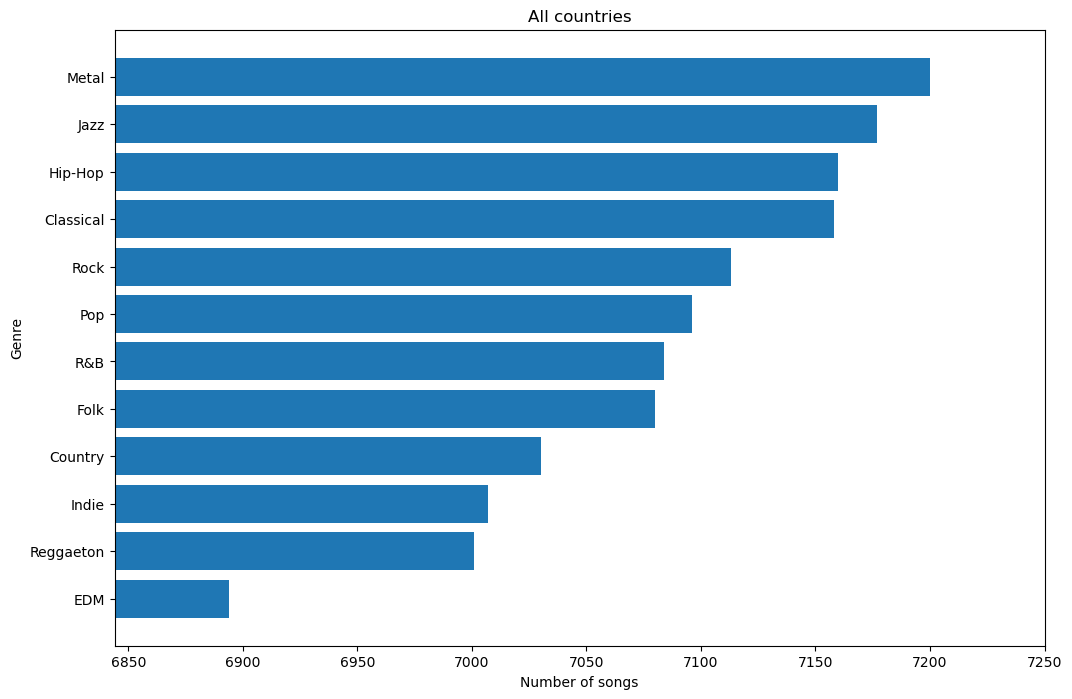

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(df_top_genres_all_countries.index, df_top_genres_all_countries.values)
plt.xlim(min(df_top_genres_all_countries.values) - 50, max(df_top_genres_all_countries.values) + 50)
plt.xlabel('Number of songs')
plt.ylabel('Genre')
plt.title('All countries')

Text(0.5, 1.0, 'America')

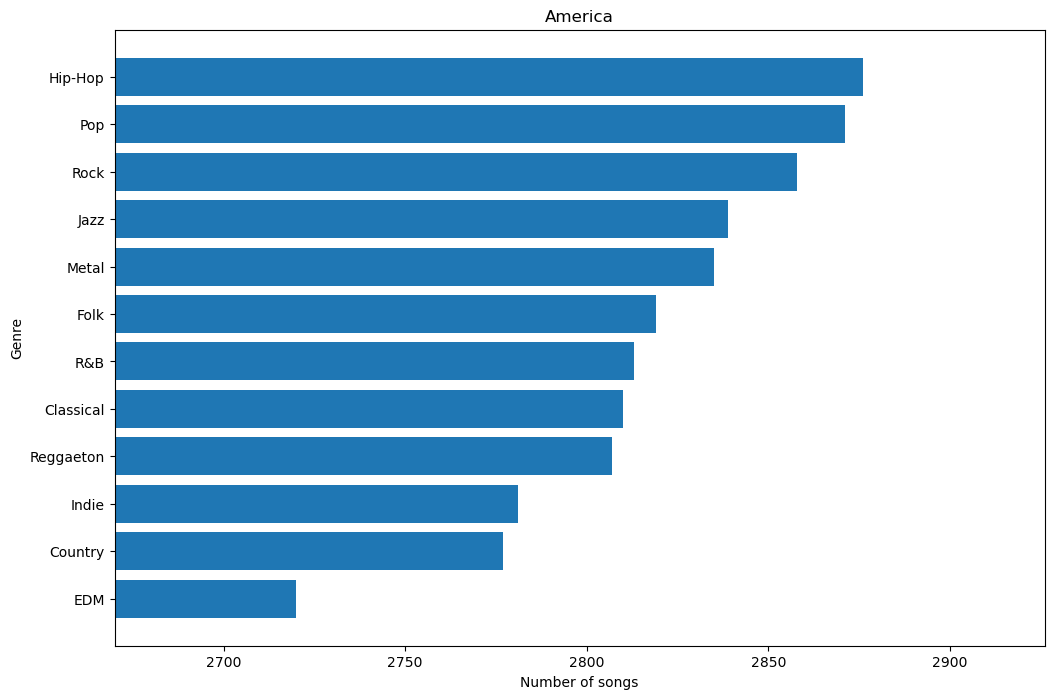

In [51]:
plt.figure(figsize=(12, 8))
plt.barh(df_top_genres_region_america.index, df_top_genres_region_america.values)
plt.xlim(min(df_top_genres_region_america.values) - 50, max(df_top_genres_region_america.values) + 50)
plt.xlabel('Number of songs')
plt.ylabel('Genre')
plt.title('America')

Text(0.5, 1.0, 'Europe')

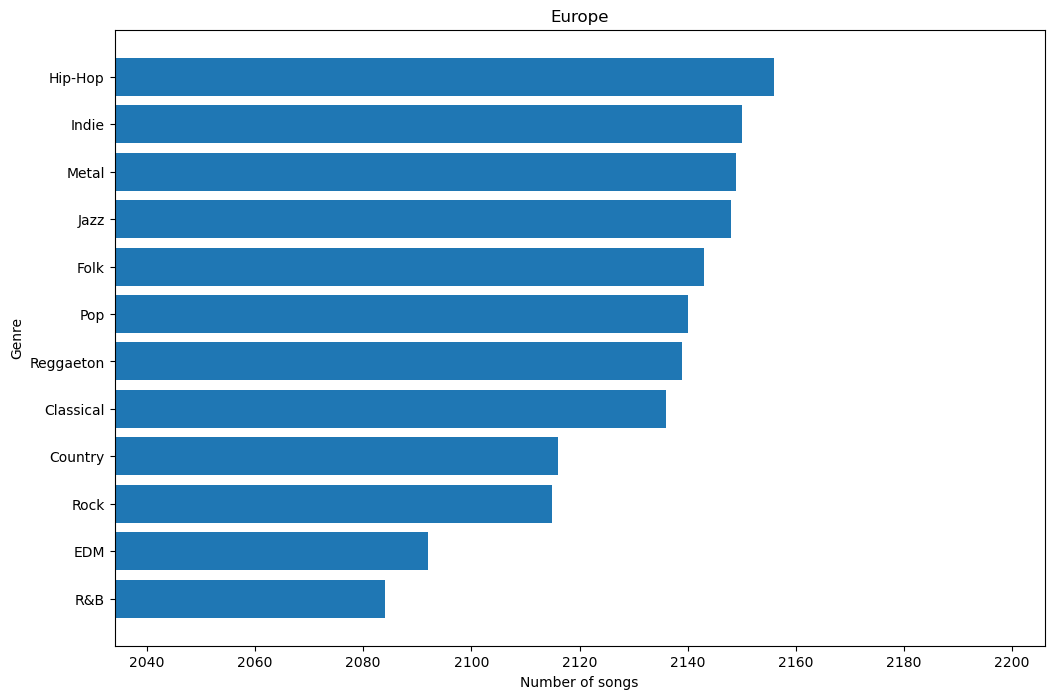

In [52]:
plt.figure(figsize=(12, 8))
plt.barh(df_top_genres_region_europe.index, df_top_genres_region_europe.values)
plt.xlim(min(df_top_genres_region_europe.values) - 50, max(df_top_genres_region_europe.values) + 50)
plt.xlabel('Number of songs')
plt.ylabel('Genre')
plt.title('Europe')

Text(0.5, 1.0, 'Asia Pacific')

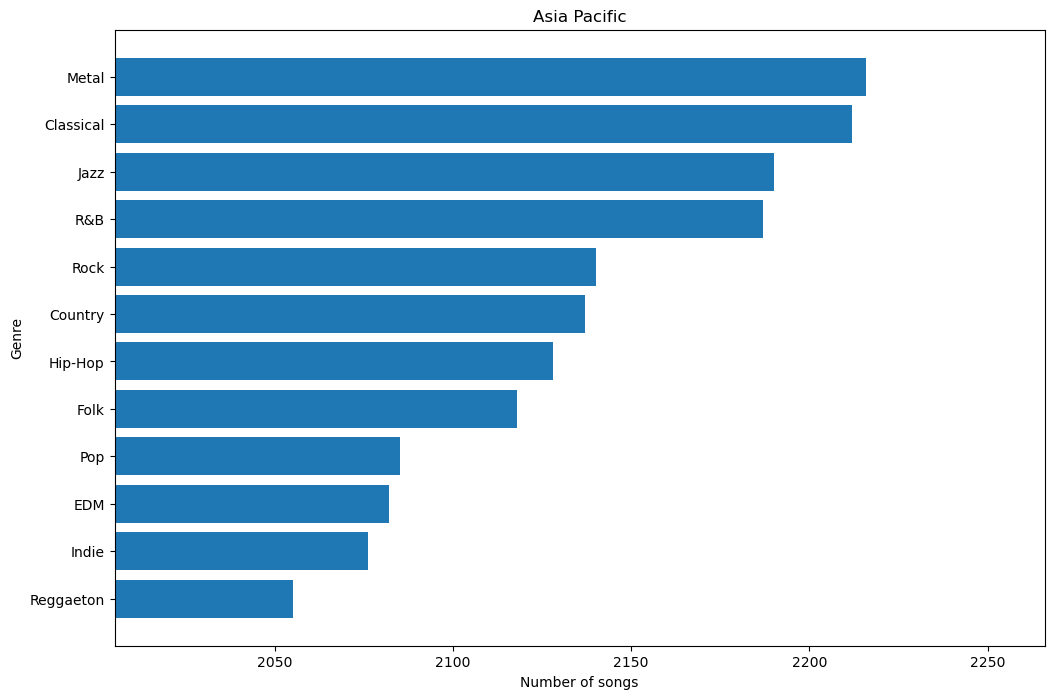

In [54]:
plt.figure(figsize=(12, 8))
plt.barh(df_top_genres_region_apac.index, df_top_genres_region_apac.values)
plt.xlim(min(df_top_genres_region_apac.values) - 50, max(df_top_genres_region_apac.values) + 50)
plt.xlabel('Number of songs')
plt.ylabel('Genre')
plt.title('Asia Pacific')

# Top 10 total stream counts

## By artist

In [56]:
df_stream_count_by_artist = df.groupby(['artist_name'])['stream_count'].sum().sort_values().tail(10)
df_stream_count_by_artist

artist_name
Todd Rodriguez      21802000
Amanda Henry        21858000
Stephanie Lee       24221000
Caitlin Smith       24327000
Samantha Johnson    24405000
Jason Owens         25351000
Kimberly Smith      26801000
Rebecca Brown       27892000
Peter Hall          34132000
Anthony Walker      40008000
Name: stream_count, dtype: int64

Text(0, 0.5, 'Artist')

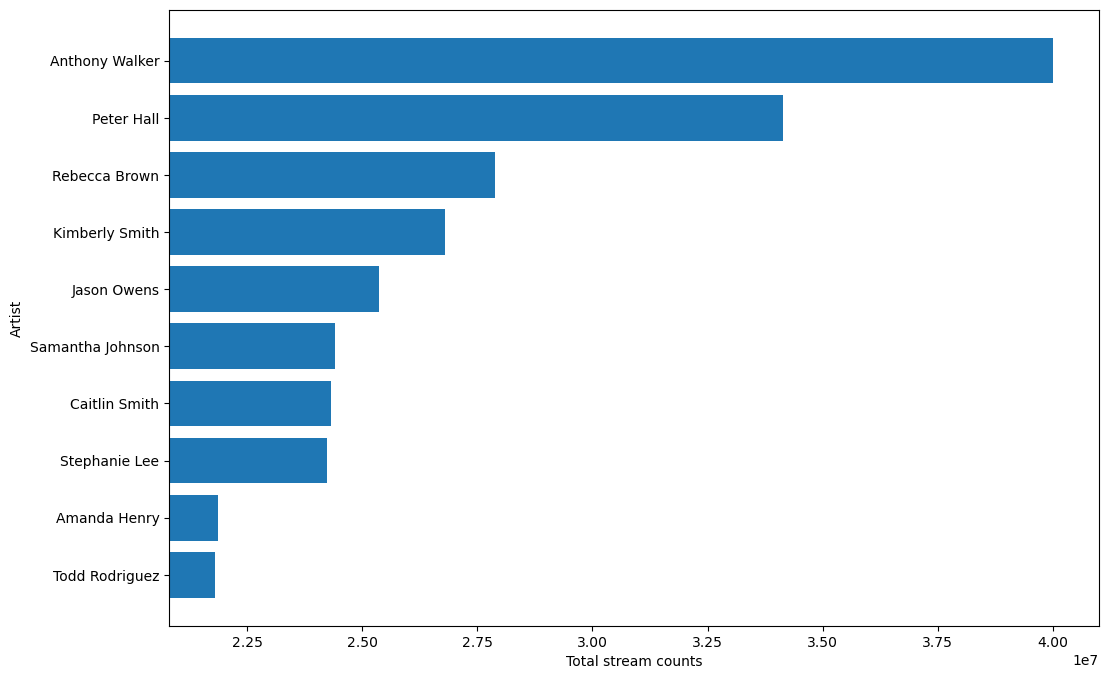

In [62]:
plt.figure(figsize=(12, 8))
plt.barh(df_stream_count_by_artist.index, df_stream_count_by_artist.values)
plt.xlim(min(df_stream_count_by_artist.values) - 1e6, max(df_stream_count_by_artist.values) + 1e6)
plt.xlabel('Total stream counts')
plt.ylabel('Artist')

## By label

In [ ]:
df_stream_count_by_label = df.groupby(['label'])['stream_count'].sum().sort_values().tail(10)
df_stream_count_by_label

label
XL Recordings      2103665000
Columbia           2162425000
Island Records     2179514000
Warner Music       2242209000
Universal Music    2276478000
Independent        2383670000
Sony Music         2420776000
EMI                2451411000
Name: stream_count, dtype: int64

Text(0, 0.5, 'Label')

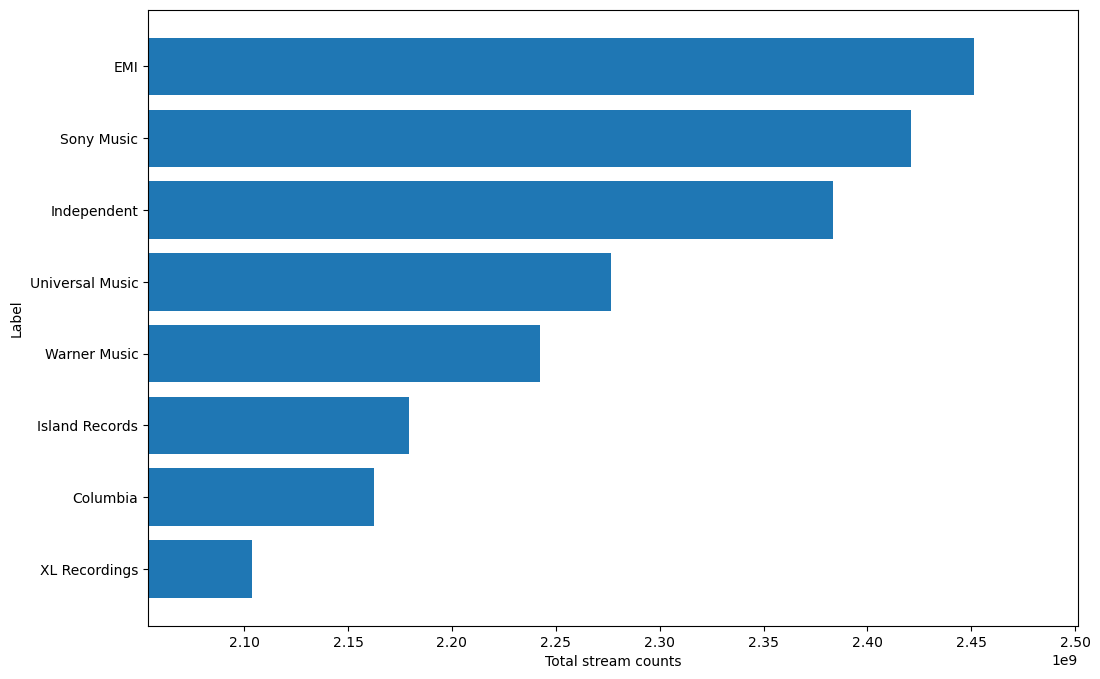

In [66]:
plt.figure(figsize=(12, 8))
plt.barh(df_stream_count_by_label.index, df_stream_count_by_label.values)
plt.xlim(min(df_stream_count_by_label.values) - 1e8 / 2, max(df_stream_count_by_label.values) + 1e8 / 2)
plt.xlabel('Total stream counts')
plt.ylabel('Label')

# Number of songs for each country

In [67]:
df_songs_per_country = df.groupby(['country'])['track_id'].count().sort_values(ascending=False)
df_songs_per_country

country
India             8629
Canada            8620
Japan             8582
France            8559
Germany           8551
Brazil            8490
United Kingdom    8458
Australia         8415
United States     8358
Mexico            8338
Name: track_id, dtype: int64

([<matplotlib.patches.Wedge at 0x1c8ae4cf050>,
 [Text(0.3449027350038244, 1.0445296086693194, 'India'),
  Text(0.8988646029520558, 0.634068155295504, 'Canada'),
  Text(1.0997472656310674, -0.023578628819137006, 'Japan'),
  Text(0.8723750778245062, -0.6700460607978282, 'France'),
  Text(0.3076319282710866, -1.056107284658246, 'Germany'),
  Text(-0.37345312186181073, -1.0346655332868047, 'Brazil'),
  Text(-0.9091024874381144, -0.6193001431727859, 'United Kingdom'),
  Text(-1.0996392008291074, 0.028171403939499632, 'Australia'),
  Text(-0.8786513186028067, 0.6617944245137982, 'United States'),
  Text(-0.33364879478438536, 1.0481786497248107, 'Mexico')],
 [Text(0.18812876454754054, 0.5697434229105378, '10.15%'),
  Text(0.490289783428394, 0.3458553574339112, '10.14%'),
  Text(0.599862144889673, -0.01286107026498382, '10.10%'),
  Text(0.47584095154063966, -0.36547966952608807, '10.07%'),
  Text(0.16779923360241084, -0.5760585189044977, '10.06%'),
  Text(-0.20370170283371491, -0.5643630181564

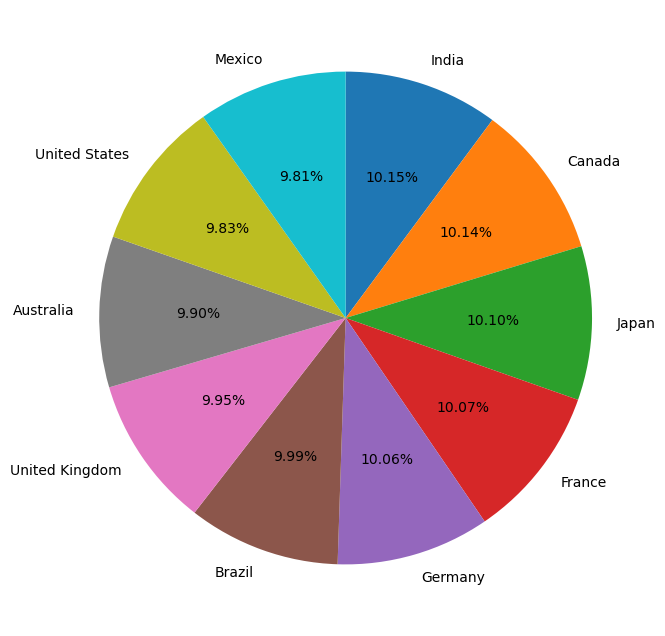

In [74]:
plt.figure(figsize=(12, 8))
plt.pie(df_songs_per_country.values, labels=df_songs_per_country.index, autopct='%1.2f%%', startangle=90, counterclock=False)